In [32]:
# Mengimpor library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering,KMeans 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [33]:
path="../Data/DataSet_Iris.csv"
data=pd.read_csv(path)
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
142,6.7,3.0,5.2,2.3,2
143,6.3,2.5,5.0,1.9,2
144,6.5,3.0,5.2,2.0,2
145,6.2,3.4,5.4,2.3,2


# Melakukan visualisasi pasangan feature

In [34]:
atribut = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'] 

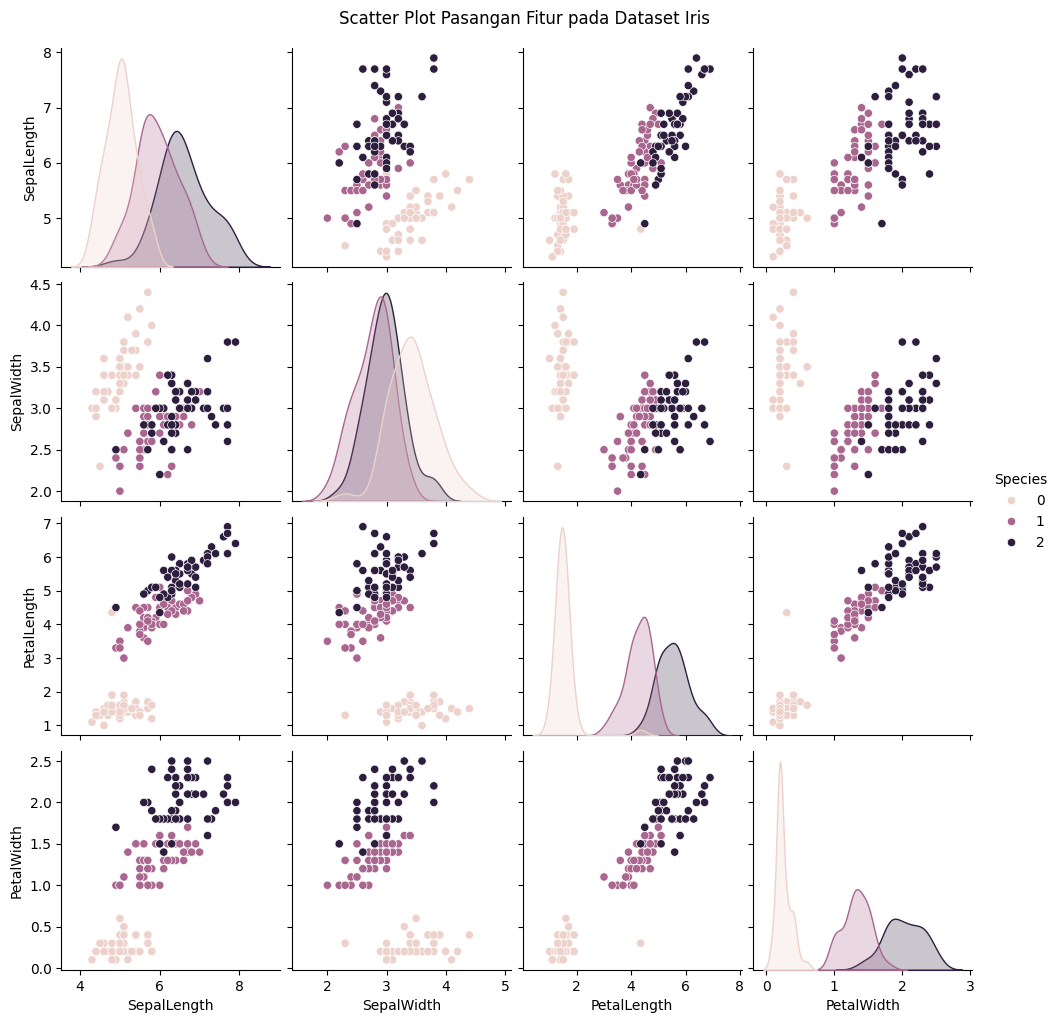

In [35]:
sns.pairplot(data, hue="Species")
plt.suptitle("Scatter Plot Pasangan Fitur pada Dataset Iris", y=1.02)
plt.show()

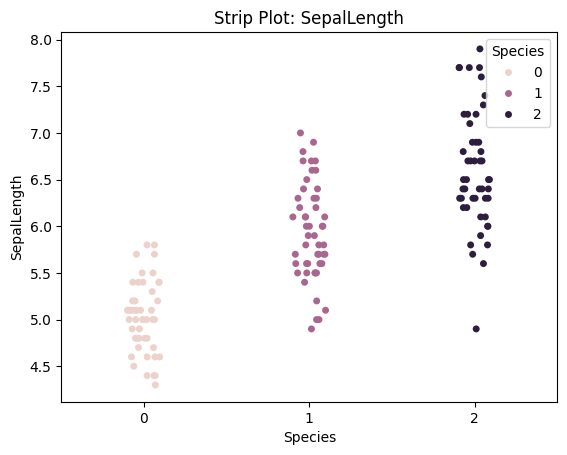

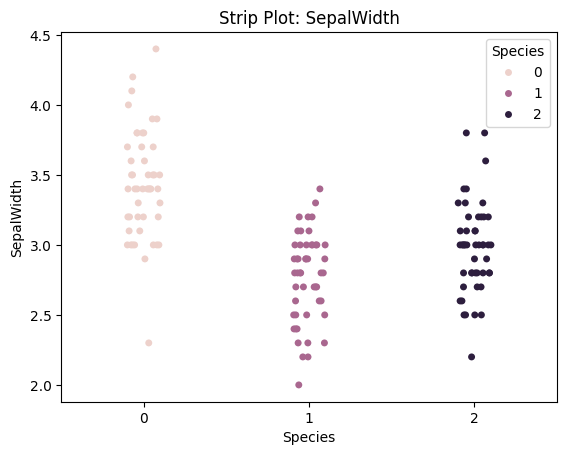

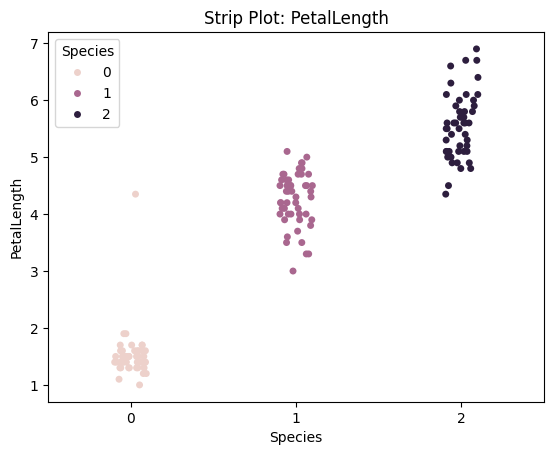

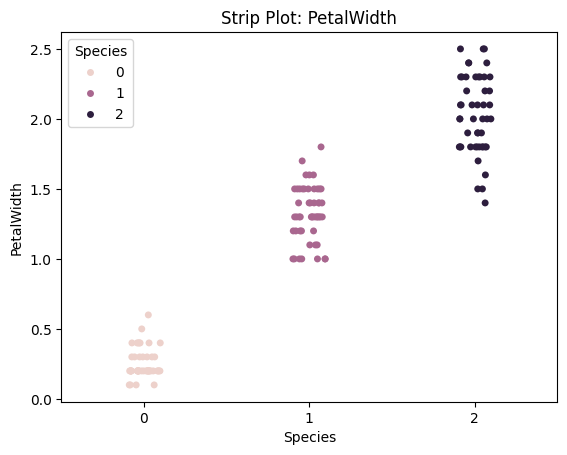

In [36]:
for fitur in atribut:
    sns.stripplot(x='Species', y=fitur, data=data,hue='Species')
    plt.title(f"Strip Plot: {fitur}")
    plt.show()

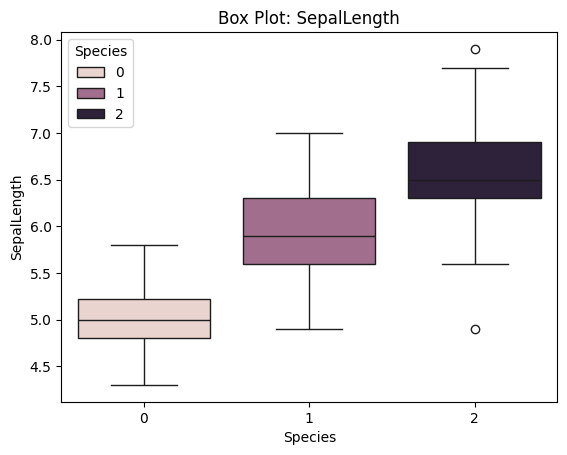

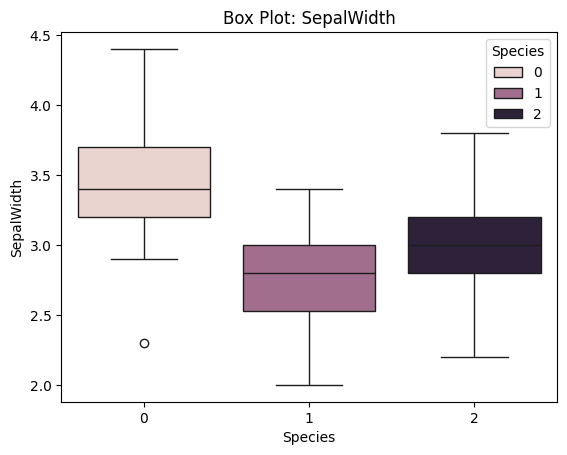

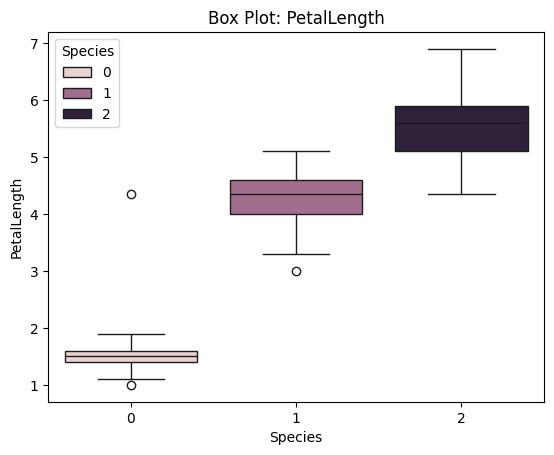

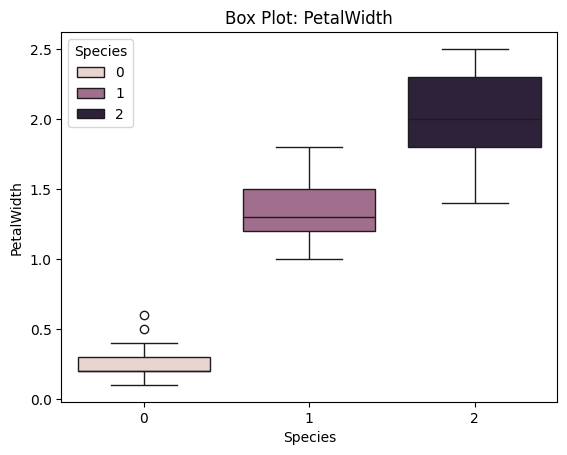

In [37]:
for fitur in atribut:
    sns.boxplot(x='Species', y=fitur, data=data,hue='Species')
    plt.title(f"Box Plot: {fitur}")
    plt.show()

Histogram

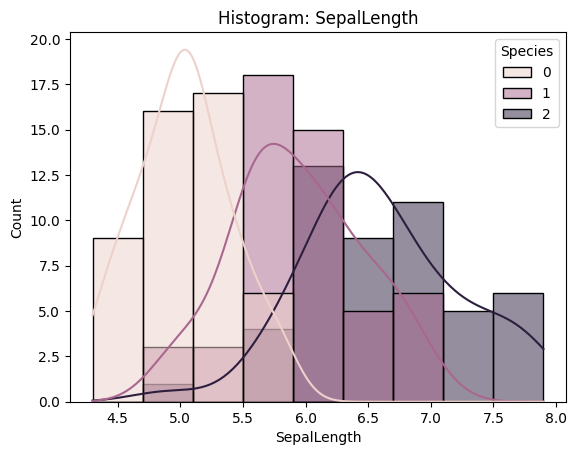

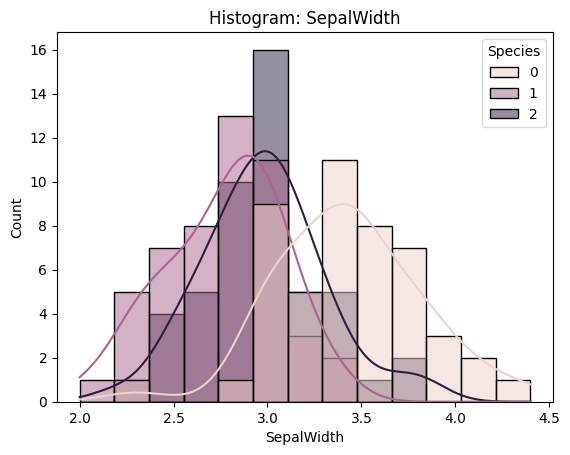

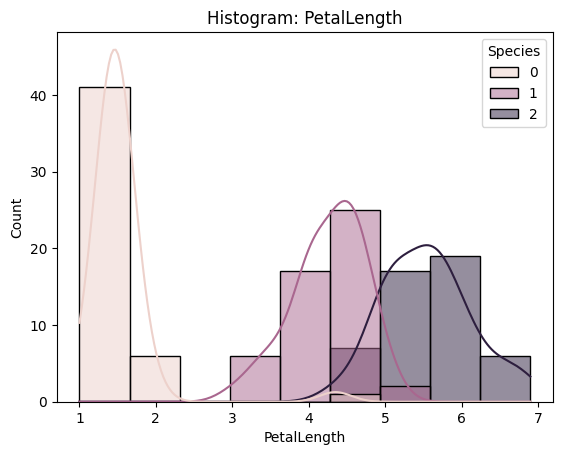

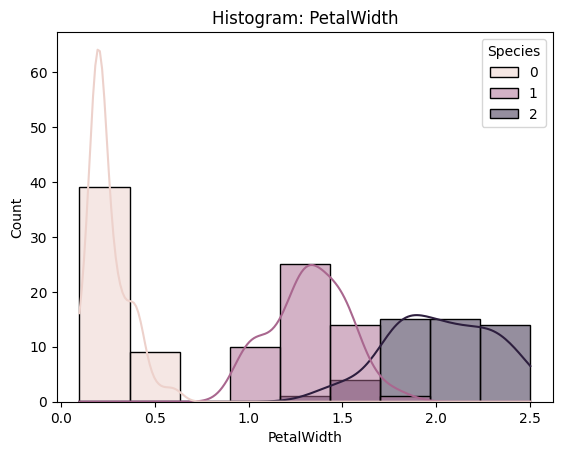

In [38]:
for feature in atribut:
    sns.histplot(data=data, x=feature, kde=True,hue='Species')  # kde=True menambahkan estimasi kepadatan kernel
    plt.title(f"Histogram: {feature}")
    plt.show()

Heatmap

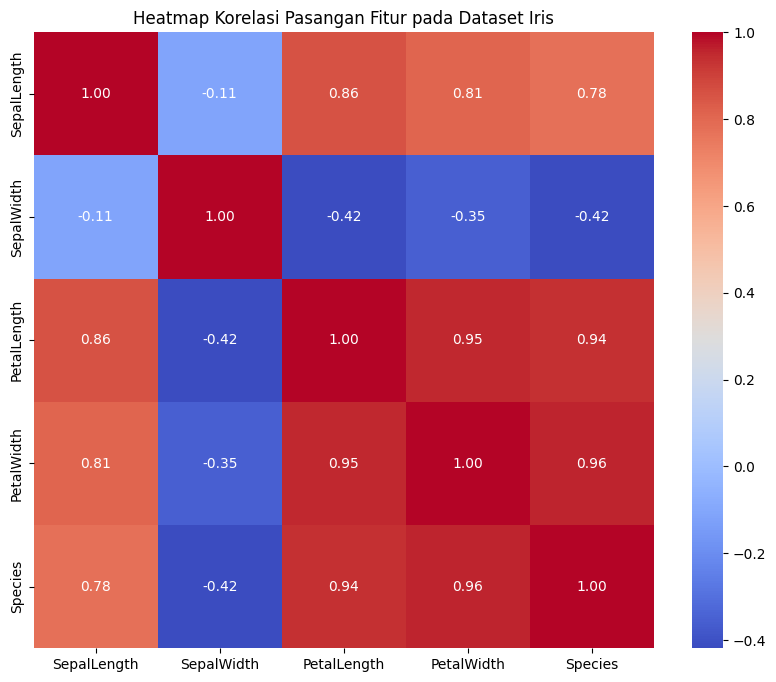

In [39]:
korelasi = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Pasangan Fitur pada Dataset Iris")
plt.show()

Frekuensi

In [40]:
for fitur in atribut:
    print(f"Frekuensi {fitur}:")
    print(data[fitur].value_counts())
    print("\n")

Frekuensi SepalLength:
SepalLength
5.1    9
6.3    9
5.0    9
5.7    8
6.7    8
5.8    7
5.5    7
6.4    7
5.4    6
6.1    6
6.0    6
5.6    6
4.8    5
6.5    5
4.9    4
6.2    4
7.7    4
6.9    4
4.6    4
5.2    4
5.9    3
4.4    3
7.2    3
6.8    3
6.6    2
4.7    2
7.6    1
7.4    1
7.3    1
7.0    1
7.1    1
5.3    1
4.3    1
4.5    1
7.9    1
Name: count, dtype: int64


Frekuensi SepalWidth:
SepalWidth
3.0    27
2.8    14
3.2    13
3.4    12
2.9    10
3.1     9
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64


Frekuensi PetalLength:
PetalLength
1.50    12
1.40    11
4.50     8
1.60     7
5.10     7
1.30     7
5.60     6
4.90     5
4.00     5
4.70     5
4.40     4
4.20     4
4.80     4
1.70     4
4.60     3
3.90     3
5.70     3
5.50     3
4.10     3
6.10     3
5.80     3
5.00     3
4.35     2
5.40     2
6.70     2
5.30     2
5.90     2

# KMeans

In [41]:
X_data = data.drop(columns=['Species'])
y_data = data['Species']

KMeans dengan metode DecisionTreeClassifier

In [42]:
kmeans_model = KMeans(n_clusters=3, random_state=42)
decision_tree_clf = DecisionTreeClassifier(random_state=42)

In [43]:
def custom_forward_feature_selection(X, y, model, max_features):
    best_features_set = set()
    remaining_features_set = set(X.columns)
    for _ in range(max_features):
        scores_list = []

        for feature in remaining_features_set:
            selected_features = best_features_set.union({feature})
            X_subset = X[list(selected_features)]  
            model.fit(X_subset)
            cluster_labels = model.labels_
            score = silhouette_score(X_subset, cluster_labels)  
            scores_list.append((score, feature))
            print("Silhouette score for feature {}: {}".format(feature, score))

        
        if scores_list:
            best_score, best_feature = max(scores_list)
            best_features_set.add(best_feature)
            remaining_features_set.remove(best_feature)

    return best_features_set

selected_features_custom = custom_forward_feature_selection(X_data, y_data, kmeans_model, max_features=4)
print("Selected features forward:", list(selected_features_custom))

X_selected_custom = X_data[list(selected_features_custom)]  
X_train_custom, X_test_custom, y_train_custom, y_test_custom = train_test_split(X_selected_custom, y_data, test_size=0.2, random_state=42)

decision_tree_clf.fit(X_train_custom, y_train_custom)
accuracy_custom = decision_tree_clf.score(X_test_custom, y_test_custom)
print("Accuracy with selected features (custom method):", accuracy_custom)

Silhouette score for feature PetalLength: 0.6829735983170164
Silhouette score for feature SepalWidth: 0.5403302093791095
Silhouette score for feature PetalWidth: 0.7247624250559581
Silhouette score for feature SepalLength: 0.5555231834447646
Silhouette score for feature PetalLength: 0.660516896117115
Silhouette score for feature SepalWidth: 0.5270342379503563
Silhouette score for feature SepalLength: 0.4954199735166216
Silhouette score for feature SepalWidth: 0.5916129694289926
Silhouette score for feature SepalLength: 0.5708026428009225
Silhouette score for feature SepalLength: 0.5452164895378043
Selected features forward: ['PetalLength', 'SepalLength', 'PetalWidth', 'SepalWidth']
Accuracy with selected features (custom method): 0.9


In [44]:
def custom_backward_feature_selection(data_X, data_y, clustering_model, max_features):
    best_features_set = set(data_X.columns)
    for _ in range(max_features):
        scores_list = []

        for feature in best_features_set:
            remaining_features = best_features_set - {feature}
            X_subset = data_X[list(remaining_features)]  
            clustering_model.fit(X_subset)
            cluster_labels = clustering_model.labels_
            score = silhouette_score(X_subset, cluster_labels)
            scores_list.append((score, feature))
            print("Silhouette score for feature {}: {}".format(feature, score))

        if scores_list:
            best_score, best_feature = max(scores_list)
            best_features_set.remove(best_feature)

    return best_features_set

selected_features_custom_backward = custom_backward_feature_selection(X_data, y_data, kmeans_model, max_features=3)
print("Selected features  backward :", list(selected_features_custom_backward))

X_selected_custom_backward = X_data[list(selected_features_custom_backward)]  
X_train_custom_backward, X_test_custom_backward, y_train_custom_backward, y_test_custom_backward = train_test_split(X_selected_custom_backward, y_data, test_size=0.2, random_state=42)


decision_tree_clf.fit(X_train_custom_backward, y_train_custom_backward)
accuracy_custom_backward = decision_tree_clf.score(X_test_custom_backward, y_test_custom_backward)
print("Accuracy with selected features ( backward method):", accuracy_custom_backward)


Silhouette score for feature PetalLength: 0.4616229993422266
Silhouette score for feature SepalWidth: 0.5708026428009225
Silhouette score for feature PetalWidth: 0.5454036161315563
Silhouette score for feature SepalLength: 0.5916129694344866
Silhouette score for feature PetalLength: 0.5270342379503562
Silhouette score for feature SepalWidth: 0.660516896117115
Silhouette score for feature PetalWidth: 0.5975272032701643
Silhouette score for feature PetalLength: 0.7247624250559581
Silhouette score for feature PetalWidth: 0.6829735983170164
Selected features  backward : ['PetalWidth']
Accuracy with selected features ( backward method): 0.9666666666666667


# Agglomerative Clustering

Agglomerative dengan metode DecisionTreeClassifier

In [45]:
agglo = AgglomerativeClustering(n_clusters=2)

In [46]:
decision_tree_clf_hierarchical = DecisionTreeClassifier(random_state=42)

In [47]:
def forward_feature_selection_hierarchical(X, y, agg, max_features):
    best_features = set()
    remaining_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in remaining_features:
            selected_features = best_features.union({feature})
            X_subset = X[list(selected_features)]  # Menggunakan list untuk mengakses kolom DataFrame
            cluster_labels = agglo.fit_predict(X_subset)
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))
            print("Silhouette score for feature {}: {}".format(feature, score))

        # Forward selection
        if scores:
            best_score, best_feature = max(scores)
            best_features.add(best_feature)
            remaining_features.remove(best_feature)

    return best_features


selected_features_forward_hierarchical = forward_feature_selection_hierarchical(X_data, y_data, agglo, max_features=4)


print("Selected features (forward hierarchical):", list(selected_features_forward_hierarchical))


X_selected_forward_hierarchical = X_data[list(selected_features_forward_hierarchical)] 
X_train_forward_hierarchical, X_test_forward_hierarchical, y_train_forward_hierarchical, y_test_forward_hierarchical = train_test_split(X_selected_forward_hierarchical, y_data, test_size=0.2, random_state=42)


decision_tree_clf_hierarchical.fit(X_train_forward_hierarchical, y_train_forward_hierarchical)
accuracy_forward_hierarchical = decision_tree_clf_hierarchical.score(X_test_forward_hierarchical, y_test_forward_hierarchical)
print("Accuracy with selected features (forward hierarchical):", accuracy_forward_hierarchical)

Silhouette score for feature PetalLength: 0.7800237180084729


Silhouette score for feature SepalWidth: 0.5589772732004137
Silhouette score for feature PetalWidth: 0.720885272588158
Silhouette score for feature SepalLength: 0.5920915283267696
Silhouette score for feature SepalWidth: 0.7367525282311279
Silhouette score for feature PetalWidth: 0.7587877264881883
Silhouette score for feature SepalLength: 0.7010740181796796
Silhouette score for feature SepalWidth: 0.7247135563622957
Silhouette score for feature SepalLength: 0.6943302612911801
Silhouette score for feature SepalLength: 0.6756382913121605
Selected features (forward hierarchical): ['PetalLength', 'SepalLength', 'PetalWidth', 'SepalWidth']
Accuracy with selected features (forward hierarchical): 0.9


In [48]:

def backward_feature_selection_hierarchical(X, y, agg, max_features):
    best_features = set(X.columns)
    for _ in range(max_features):
        scores = []

        for feature in best_features:
            remaining_features = best_features - {feature}
            X_subset = X[list(remaining_features)]  
            cluster_labels = agglo.fit_predict(X_subset)
            score = silhouette_score(X_subset, cluster_labels)
            scores.append((score, feature))
            print("Silhouette score for feature {}: {}".format(feature, score))

        
        if scores:
            best_score, best_feature = max(scores)
            best_features.remove(best_feature)

    return best_features


selected_features_backward_hierarchical = backward_feature_selection_hierarchical(X_data, y_data, agglo, max_features=3)


print("Selected features (backward hierarchical):", list(selected_features_backward_hierarchical))


X_selected_backward_hierarchical = X_data[list(selected_features_backward_hierarchical)]  
X_train_backward_hierarchical, X_test_backward_hierarchical, y_train_backward_hierarchical, y_test_backward_hierarchical = train_test_split(X_selected_backward_hierarchical, y_data, test_size=0.2, random_state=42)

decision_tree_clf_hierarchical.fit(X_train_backward_hierarchical, y_train_backward_hierarchical)
accuracy_backward_hierarchical = decision_tree_clf_hierarchical.score(X_test_backward_hierarchical, y_test_backward_hierarchical)
print("Accuracy with selected features (backward hierarchical):", accuracy_backward_hierarchical)

Silhouette score for feature PetalLength: 0.5387078826994085
Silhouette score for feature SepalWidth: 0.6943302612911801
Silhouette score for feature PetalWidth: 0.6790500910945859
Silhouette score for feature SepalLength: 0.724713556366795
Silhouette score for feature PetalLength: 0.623311433820103
Silhouette score for feature SepalWidth: 0.7587877264881883


Silhouette score for feature PetalWidth: 0.7367525282311279
Silhouette score for feature PetalLength: 0.720885272588158
Silhouette score for feature PetalWidth: 0.7800237180084729
Selected features (backward hierarchical): ['PetalLength']
Accuracy with selected features (backward hierarchical): 0.8333333333333334
